Cell 1 : Data Prep for Neural Network

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.data_loader import load_raw_data
from src.preprocessing import clean_and_feature_engineer
from src.models import get_deep_learning_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and clean
df = clean_and_feature_engineer(load_raw_data())

# 1. Prepare features - Neural networks need all numbers
# We will use get_dummies to turn text into numbers
features = ['Income', 'Age', 'Children', 'Recency', 'TotalSpending', 'Education', 'Marital_Status']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Response']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale - Neural Networks require scaling to work correctly!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Input shape: {X_train_scaled.shape[1]}")

Input shape: 8


# Cell 2 : Train the Neural Network

In [2]:
# 1. Initialize the model
input_dim = X_train_scaled.shape[1]
nn_model = get_deep_learning_model(input_dim)

# 2. Train (This is where the 'learning' happens)
print("Starting training...")
history = nn_model.fit(
    X_train_scaled, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,
    verbose=1
)

# 3. Save the model
os.makedirs('../models', exist_ok=True)
nn_model.save('../models/mlp_response_model.keras')
print("\nDeep Learning model saved!")

Starting training...
Epoch 1/50


f:\customer-analytics-ml\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
f:\customer-analytics-ml\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7781 - loss: 0.5442 - val_accuracy: 0.8531 - val_loss: 0.4149
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3853 - val_accuracy: 0.8531 - val_loss: 0.3734
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3595 - val_accuracy: 0.8616 - val_loss: 0.3647
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3586 - val_accuracy: 0.8616 - val_loss: 0.3653
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3452 - val_accuracy: 0.8616 - val_loss: 0.3676
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3399 - val_accuracy: 0.8672 - val_loss: 0.3647
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3429 - val_accuracy: 0.8672 - val_loss: 0.3677
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3413 - val_accuracy: 0.8672 - val_loss: 0.3666
Epo

# Cell 3 : Evaluate the "Brain"

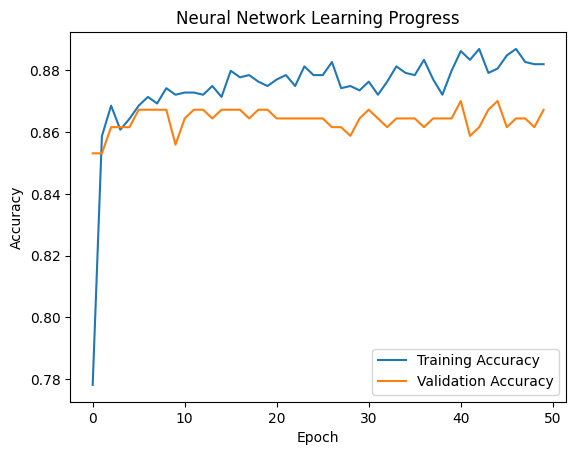

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3739 
Deep Learning Test Accuracy: 0.8442


In [3]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Learning Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Deep Learning Test Accuracy: {accuracy:.4f}")